In [1]:
 !pip install keras
 !pip install tensorflow

In [2]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [3]:
!pip install -q keras

In [4]:
import keras

In [5]:
# importing libraries
import numpy as np
import pandas as pd #data precessing ,csv file I/o (eg pd.read_csv)
import os
import random


# importing libraries for data visualization
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import seaborn as sns
import cv2 # computer vision for vision related


#importing tensorflow for model creation and its dependencies
import tensorflow # framework to dovelop dl model

# generate batches of tensor image dat with real time data augemtation
from keras.preprocessing.image import ImageDataGenerator

# for enabling inline plotting


DEEP Learning model for YOGAASANA

In [6]:
TraininigImagePath='/content/drive/MyDrive/DEEP LEARNING/YOGASANA DATASET/Train'

In [7]:
ValidateImagePath='/content/drive/MyDrive/DEEP LEARNING/YOGASANA DATASET/Validate'

In [8]:
TestingImagePath='/content/drive/MyDrive/DEEP LEARNING/YOGASANA DATASET/Test'

In [9]:
#defining pre _processing transformation on raw images of training data  - tranform imafges in mutiple diff ways - diff orientation
train_datagen=ImageDataGenerator(
    rescale=1./255,   #intensity b/w 0 to 255 - to avoid bigger calculn -rescaling to 1
    shear_range=0.1,  #to change tilts the angle
    zoom_range=0.1,  # to zoom
    horizontal_flip=True  # mirror image

)   # so that our model learn pattern - one image of dog can be converted into 20-30 images hence we use image generator





In [10]:
#defining pre _processing transformation on raw images of testing data
test_datagen=ImageDataGenerator(rescale=1./255)   # only for test that's why not zoom,shear

In [11]:
#generating the training data
training_set= train_datagen.flow_from_directory(
    TraininigImagePath,
    target_size=(128,128),
    batch_size=32,
    class_mode='categorical'

)

Found 571 images belonging to 10 classes.


In [12]:
#generating the testing data
test_set=test_datagen.flow_from_directory(
    TestingImagePath,
    target_size=(128,128),
    batch_size=32,
    class_mode='categorical'

)

Found 70 images belonging to 10 classes.


In [13]:
#generating the VALIDATE data
valid_set=train_datagen.flow_from_directory(
    ValidateImagePath,
    target_size=(128,128),
    batch_size=32,
    class_mode='categorical'

)

Found 69 images belonging to 10 classes.


In [14]:
#function to plot any random image from dataset
def showImage(class_name):
  random_index=random.choice(list(range(1,49)))
  folder_path=os.path.join(TraininigImagePath,class_name)
  try:
    image_path=os.path.join(folder_path,str(random_index).zfill(2)+".jpg")
  except:
    image_path=os.path.join(folder_path,str(random_index).zfil(2)+".jpg")
    plt.imshow(mpimg.imread(image_path))
  plt.title(class_name)
  plt.axis(False)

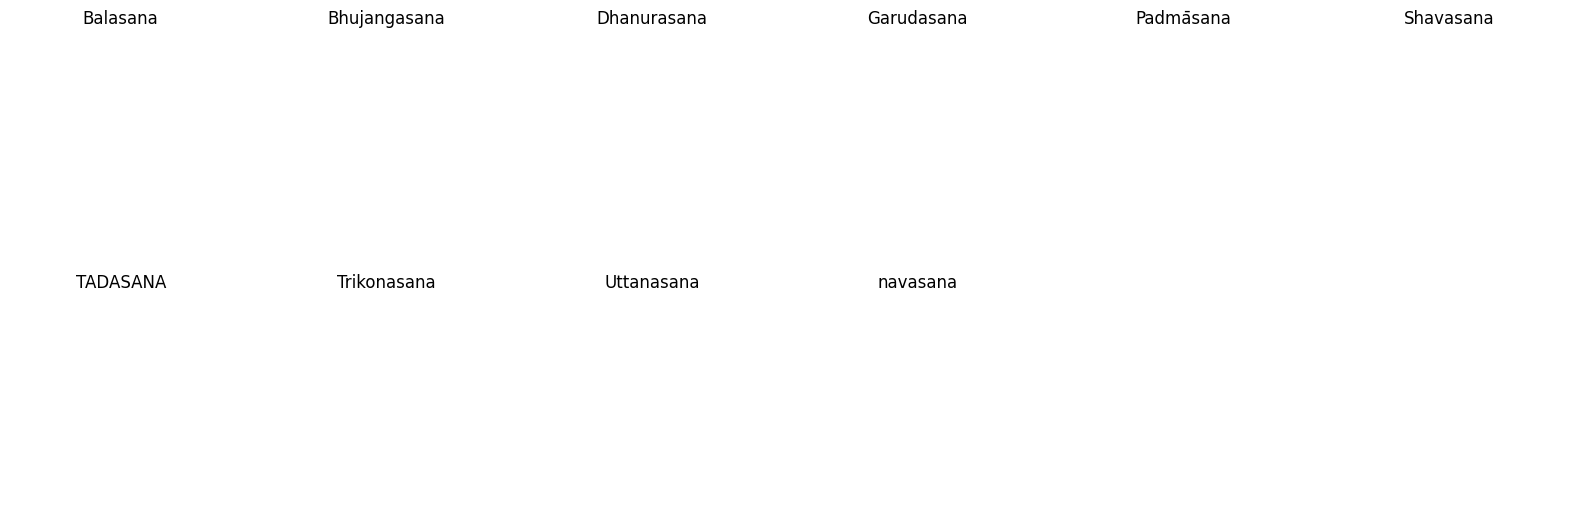

In [15]:
plt.figure(figsize=(20,20))
for labels,number in training_set.class_indices.items():
  plt.subplot(6,6,number+1)
  showImage(labels)

In [16]:
# printing class labels for each face
test_set.class_indices


{'Balasana': 0,
 'Bhujangasana': 1,
 'Dhanurasana': 2,
 'Garudasana': 3,
 'Padmāsana': 4,
 'Shavasana': 5,
 'TADASANA': 6,
 'Trikonasana': 7,
 'Uttanasana': 8,
 'navasana': 9}

Creating a list of yogas and classes

In [17]:
## creating lookup table for all balls
# class_indices hvae the numeric tag for each balls
TrainClasses=training_set.class_indices


In [18]:

#storing the face and the numeric tag for future reference
ResultMap={}
for yogavalue,yogaName in zip(TrainClasses.values(),TrainClasses.keys()):
  ResultMap[yogavalue]=yogaName

In [19]:
# saving the face map for future refernce
import pickle
with open("/content/drive/MyDrive/DEEP LEARNING",'wb') as f:
  pickle.dump(ResultMap, f, pickle.HIGHEST_PROTOCOL)
print("Mapping of Face and its ID ",ResultMap)

IsADirectoryError: ignored

In [20]:
#THE NO of neurons for the output layer is equal to yhe number of faces
outputNeurons=len(ResultMap)
print('\n THe number of output neurons:',outputNeurons)


 THe number of output neurons: 10


Create CNN Deep laerning Mode


In [21]:
from keras.models import Sequential

In [22]:
from keras.layers import MaxPool2D


In [23]:
from keras.layers import Flatten


In [24]:
from keras.layers import Dense

In [25]:

from keras.layers import Convolution2D


Initialize the CNN

In [26]:
classifier=Sequential()   #one hidden layer after one another

STEP 1 convolution

adding the first layer of cnn
we are using the format (64,64,3) because we are using tensorflow backend
it means 3 matrix of size (64*64) pixels reprenting RED, green , and Blue components of pixels

32= no of filter,our choice kernel size- size of my filter -3 cross 3 filter-dimn can also be chanded strides - no of move

why we take filters- localisation effect-tells the pattern of the pixels we can detect 8 by any means if part is given bcz we locakise

maxpooling -reduce size of data find largest value- reducing the dimn of image - keeping the most relevant part of image

In [27]:
classifier.add(Convolution2D(32,kernel_size=(3,3),strides=(1,1),input_shape=(128,128,3),activation='relu'))

In [28]:
#step 2 MAX POOLING
classifier.add(MaxPool2D(pool_size=(2,2)))

In [29]:
###### additional layer of convolution for better accuracy ####

In [31]:
classifier.add(Convolution2D(64,kernel_size=(3,3),strides=(1,1),activation='relu'))

In [32]:
classifier.add(Convolution2D(64,kernel_size=(3,3),strides=(1,1),activation='relu'))

ADDING MORE FILTER-64

In [33]:
classifier.add(MaxPool2D(pool_size=(2,2)))

In [34]:
#STEP 3 FLATTENING
classifier.add(Flatten())

In [35]:
#step 4 fully connected neural network
classifier.add(Dense(256,activation='relu'))

In [36]:
classifier.add(Dense(outputNeurons,activation='softmax'))

In [37]:
from keras.src.engine.training import optimizer
# compiling the cnn
# classifier.compile(loss='binary_crossentropy,optimizer='adam',metrics=['accuracy])
classifier.compile(loss='categorical_crossentropy',optimizer='rmsprop',metrics=['accuracy'])


In [38]:
classifier.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 126, 126, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 63, 63, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 61, 61, 64)        18496     
                                                                 
 conv2d_2 (Conv2D)           (None, 59, 59, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 29, 29, 64)        0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 53824)             0

In [39]:
#FITTING THE MODEL

In [40]:
import time


In [41]:
# measuring the time taken by the model to train
StartTime=time.time()
# starting the model training
model_history=classifier.fit_generator(
    training_set,
    steps_per_epoch=len(training_set),
    epochs=20,
    validation_data=valid_set,
    validation_steps=len(valid_set),
    verbose=1

)
EndTime=time.time()
print("Total time taken:",round(EndTime-StartTime)/60),'minutes ###'


<ipython-input-41-99045eef5fdc>:4: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  model_history=classifier.fit_generator(


Epoch 1/20
18/18 [==============================] - 197s 11s/step - loss: 4.7691 - accuracy: 0.1559 - val_loss: 2.2937 - val_accuracy: 0.2029
Epoch 2/20
18/18 [==============================] - 35s 2s/step - loss: 2.3472 - accuracy: 0.1524 - val_loss: 2.2626 - val_accuracy: 0.2754
Epoch 3/20
18/18 [==============================] - 35s 2s/step - loss: 2.3220 - accuracy: 0.2084 - val_loss: 2.1872 - val_accuracy: 0.1739
Epoch 4/20
18/18 [==============================] - 38s 2s/step - loss: 2.0593 - accuracy: 0.3240 - val_loss: 1.9529 - val_accuracy: 0.2609
Epoch 5/20
18/18 [==============================] - 35s 2s/step - loss: 1.9266 - accuracy: 0.3415 - val_loss: 1.9408 - val_accuracy: 0.3043
Epoch 6/20
18/18 [==============================] - 33s 2s/step - loss: 1.5678 - accuracy: 0.4939 - val_loss: 1.7103 - val_accuracy: 0.4058
Epoch 7/20
18/18 [==============================] - 32s 2s/step - loss: 1.4229 - accuracy: 0.5499 - val_loss: 1.6235 - val_accuracy: 0.5072
Epoch 8/20
18/18 [

(None, 'minutes ###')

In [43]:
accuracy=model_history.history['accuracy']
val_accuracy=model_history.history['val_accuracy']

loss=model_history.history['loss']
val_loss=model_history.history['val_loss']

Text(0.5, 1.0, 'Training vs validation accuracy')

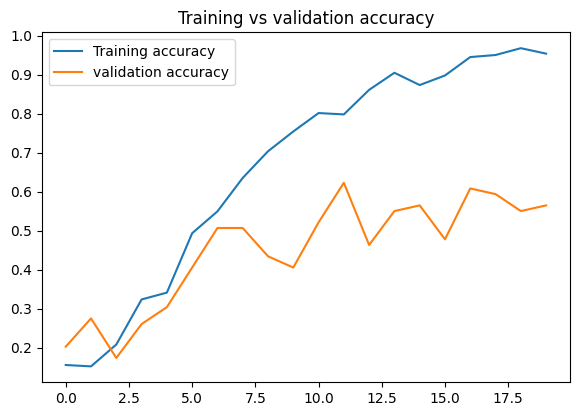

In [44]:
plt.figure(figsize=(15,10))

plt.subplot(2,2,1)
plt.plot(accuracy,label="Training accuracy")
plt.plot(val_accuracy,label="validation accuracy")
plt.legend()
plt.title("Training vs validation accuracy")



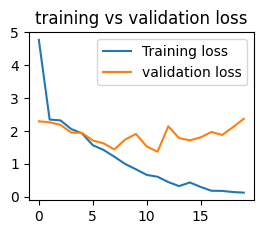

In [45]:
plt.subplot(2,2,2)
plt.plot(loss,label="Training loss")
plt.plot(val_loss,label="validation loss")
plt.legend()
plt.title("training vs validation loss")

plt.show()

In [46]:
#saving the mode
classifier.save("/content/drive/MyDrive/DEEP LEARNING")


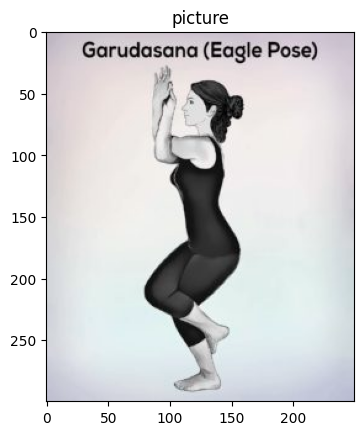

##############################
prediction is: Garudasana


In [47]:
#TESTING THE MODEL ON A DIFF FACE
### MAKING SINGLE PREDICTION###
from tensorflow.keras.utils import load_img,img_to_array

testImage="/content/drive/MyDrive/DEEP LEARNING/YOGASANA DATASET/Test/Garudasana/Garudasana_3.jpg"
test_image=load_img(testImage,target_size=(128,128))
test_image=img_to_array(test_image)
test_image=np.expand_dims(test_image,axis=0)
result=classifier.predict(test_image,verbose=0)

img=cv2.imread(testImage)
# gray=cv2.cvtcolor(img,cv2.color_RGB2HSV)
plt.imshow(img)
plt.title('picture')
plt.show()

print('###'*10)
print('prediction is:',ResultMap[np.argmax(result)])




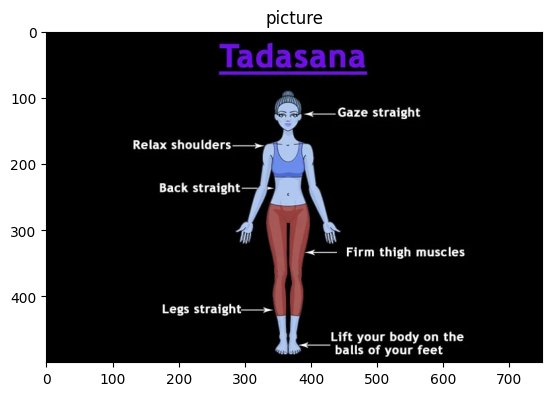

##############################
prediction is: TADASANA


In [50]:

testImage="/content/drive/MyDrive/DEEP LEARNING/YOGASANA DATASET/Train/TADASANA/Tadasana_28.jpg"
test_image=load_img(testImage,target_size=(128,128))
test_image=img_to_array(test_image)
test_image=np.expand_dims(test_image,axis=0)
result=classifier.predict(test_image,verbose=0)

img=cv2.imread(testImage)
# gray=cv2.cvtcolor(img,cv2.color_RGB2HSV)
plt.imshow(img)
plt.title('picture')
plt.show()

print('###'*10)
print('prediction is:',ResultMap[np.argmax(result)])



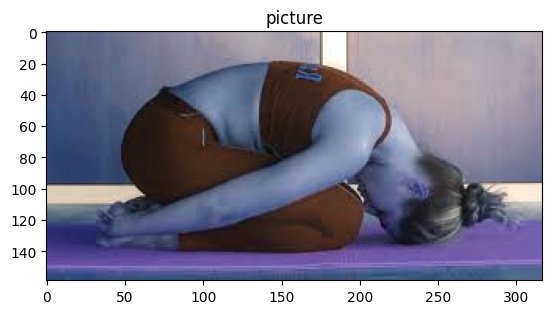

##############################
prediction is: Balasana


In [48]:

testImage="/content/drive/MyDrive/DEEP LEARNING/YOGASANA DATASET/Train/Balasana/Balasana_31.jpeg"
test_image=load_img(testImage,target_size=(128,128))
test_image=img_to_array(test_image)
test_image=np.expand_dims(test_image,axis=0)
result=classifier.predict(test_image,verbose=0)

img=cv2.imread(testImage)
# gray=cv2.cvtcolor(img,cv2.color_RGB2HSV)
plt.imshow(img)
plt.title('picture')
plt.show()

print('###'*10)
print('prediction is:',ResultMap[np.argmax(result)])

